In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [19]:
# Clean data - Remove rows where page views are in the top/bottom 2.5%
df = df.loc[(df['value'] > df['value'].quantile(.025)) 
        & (df['value'] < df['value'].quantile(.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [42]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(20,6))
    ax.plot(df.index, df['value'], color='r', linewidth=2)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_ylabel('Page Views')
    ax.set_xlabel('Date')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

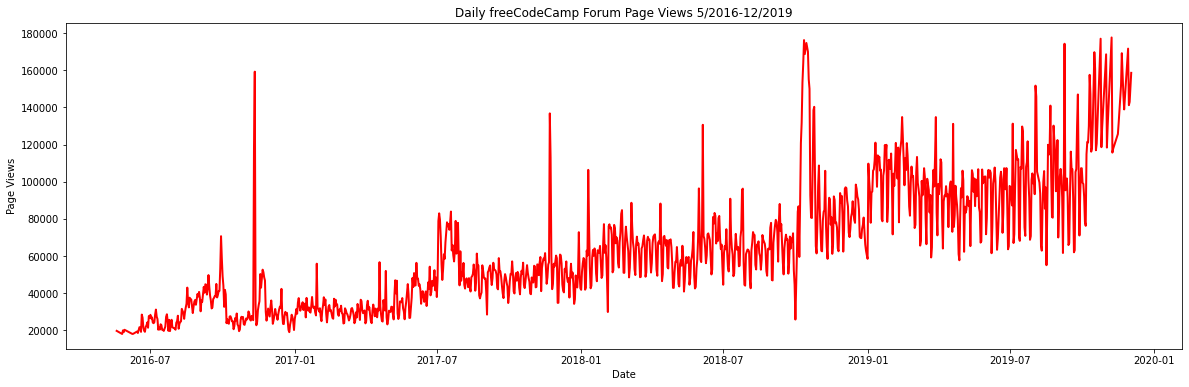

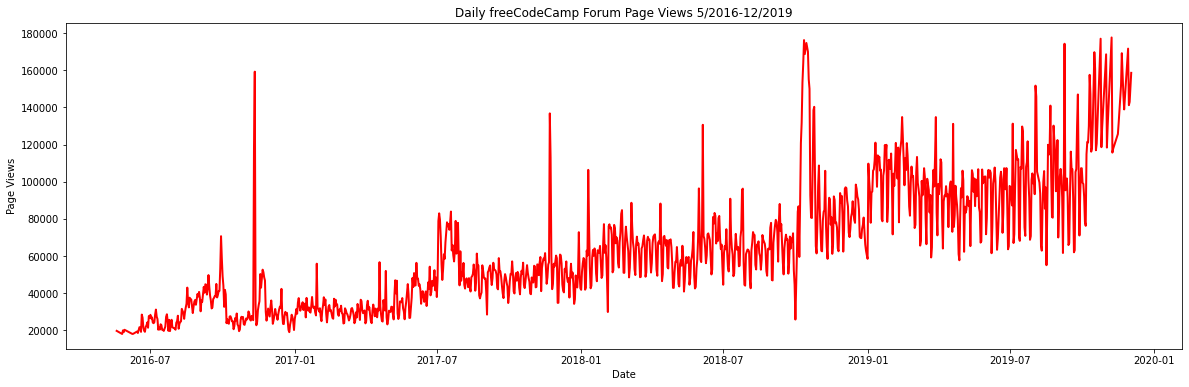

In [43]:
draw_line_plot()

In [107]:
df_bar = df.groupby(by=[df.index.year, df.index.month]).mean()
df_bar.unstack()


value                                                           \
date             1              2             3             4             5    
date                                                                           
2016            NaN            NaN           NaN           NaN  19432.400000   
2017   32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018   58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019  102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                              \
date            6             7              8             9              10   
date                                                                           
2016  21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017  43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018  70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019  90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                    
date             11             12  
date                                
2016   40448.633333   27832.419355  
2017   57701.566667   48420.580645  
2018   78688.333333   80047.483871  
2019  143166.428571  150733.500000

In [142]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby(by=[df.index.year, df.index.month]).mean()
    df_bar.index.rename(['year', 'month'], inplace=True)

    # Draw bar plot
    ax = df_bar.unstack().plot(kind='bar')
    fig = ax.get_figure()
    fig.set_size_inches(20,20)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    legend = plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December'], prop={'size': 25}, title='Months')
    plt.setp(legend.get_title(),fontsize='xx-large')



    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

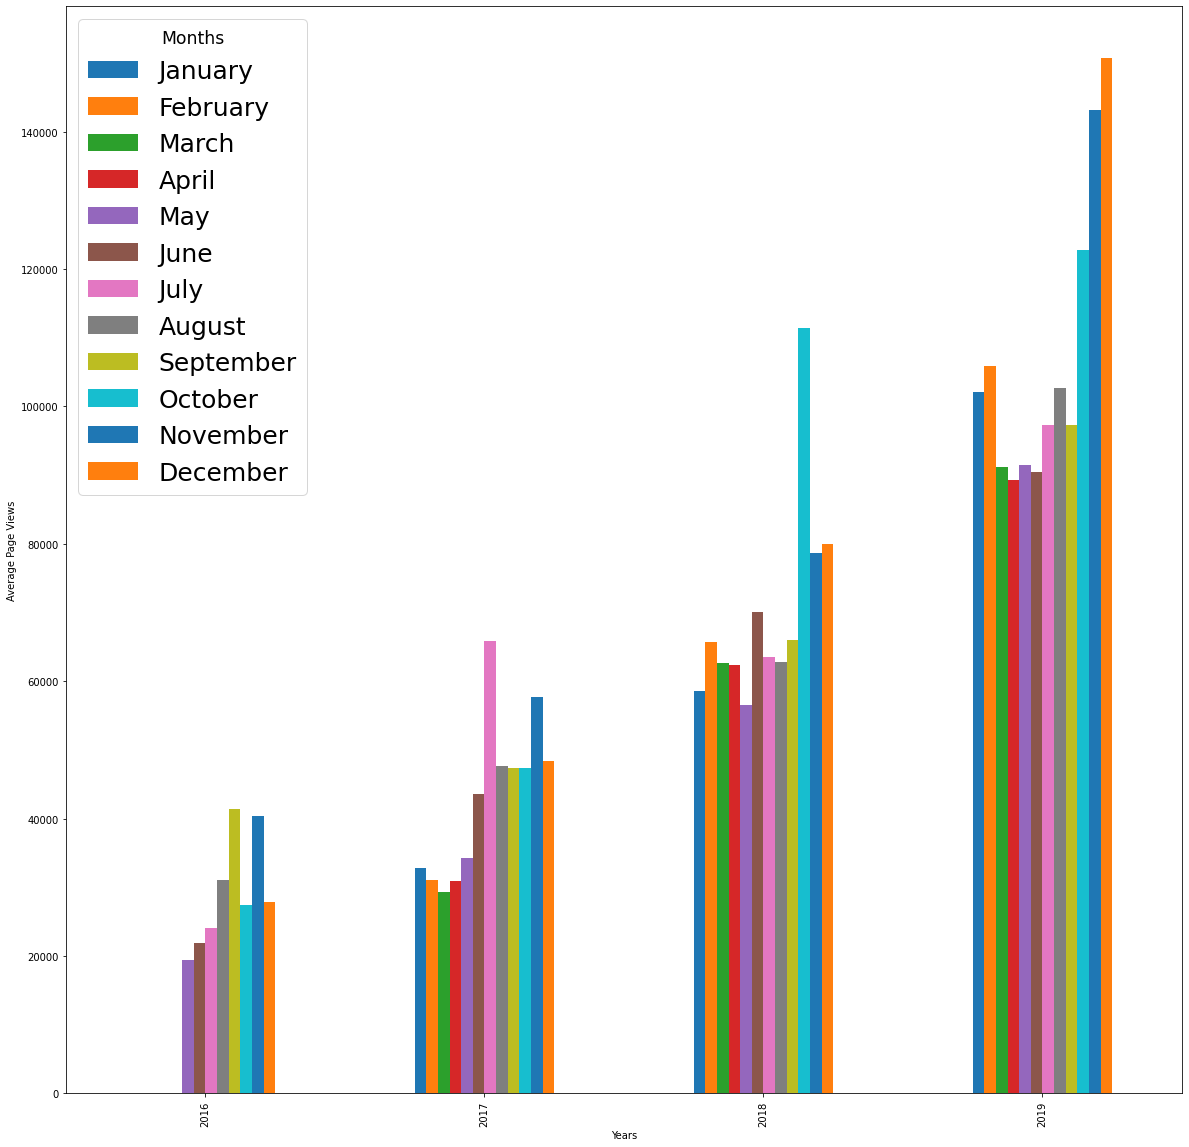

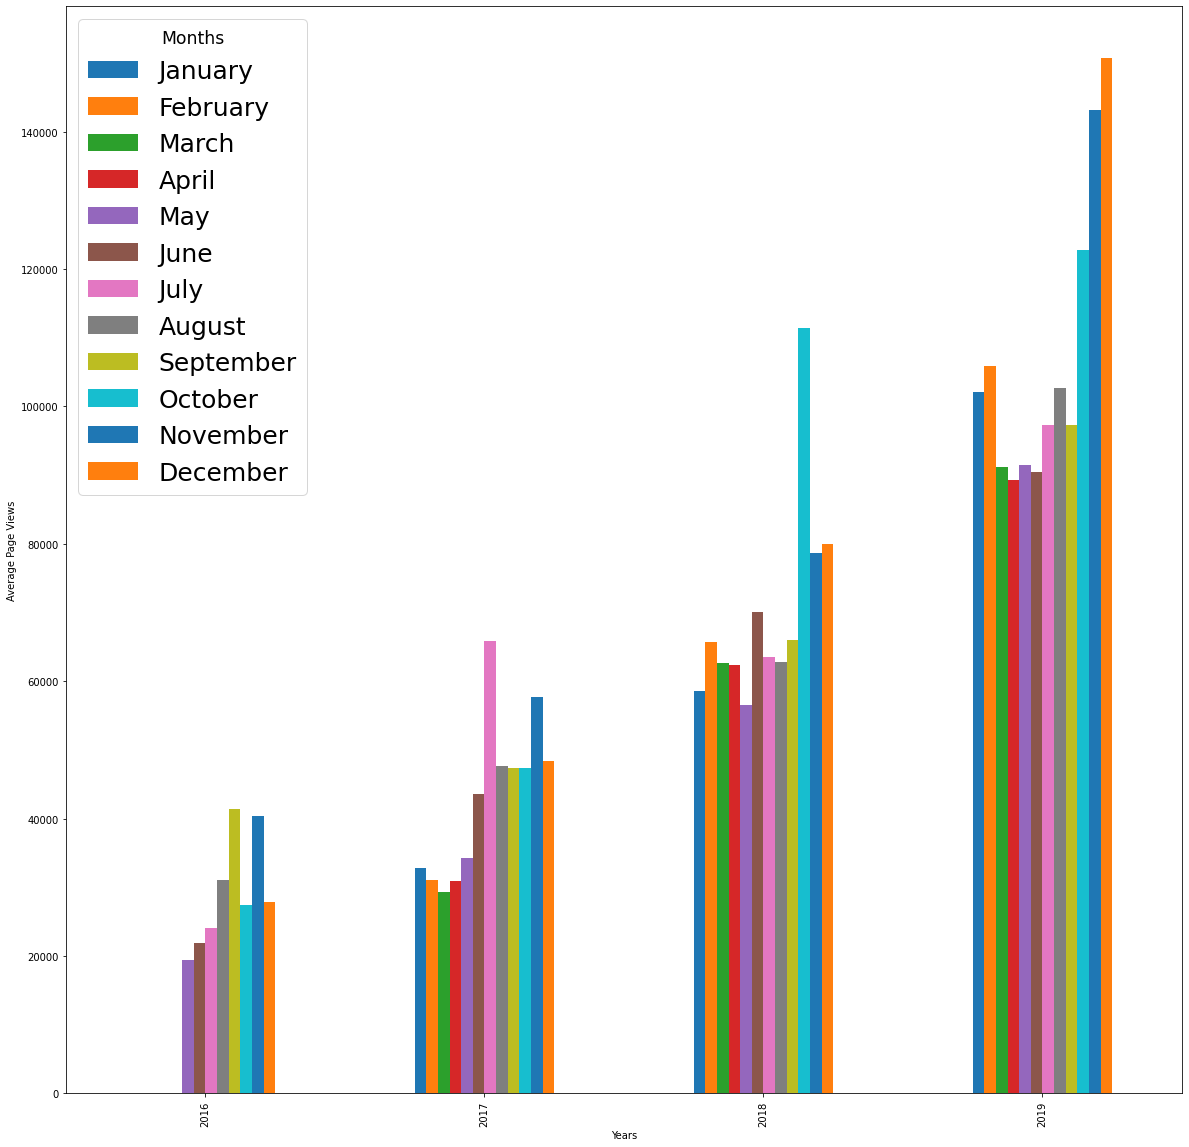

In [143]:
draw_bar_plot()

In [156]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.boxplot(x = df_box['year'], y = df_box['value'], ax = ax[0]).set(xlabel='Year', ylabel='Page Views')
    sns.boxplot(x = df_box['month'], y = df_box['value'],
        order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], 
        ax = ax[1]).set(xlabel='Month', ylabel='Page Views')
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[1].set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

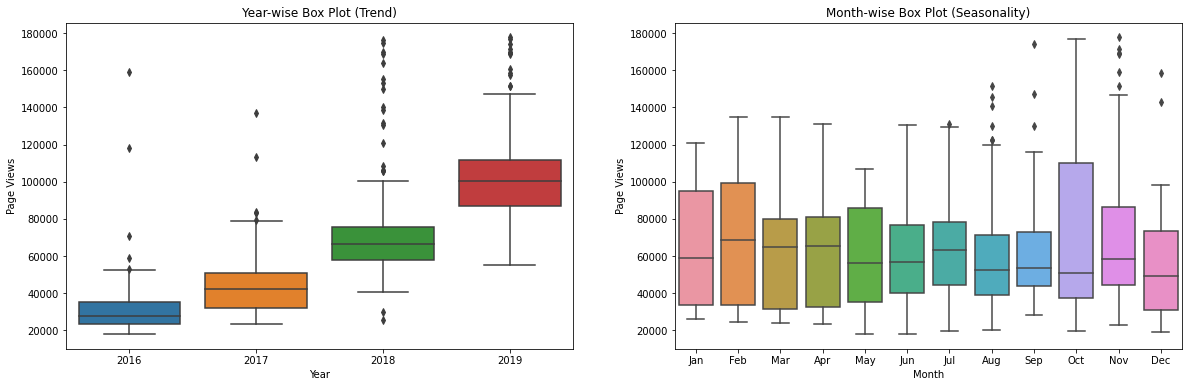

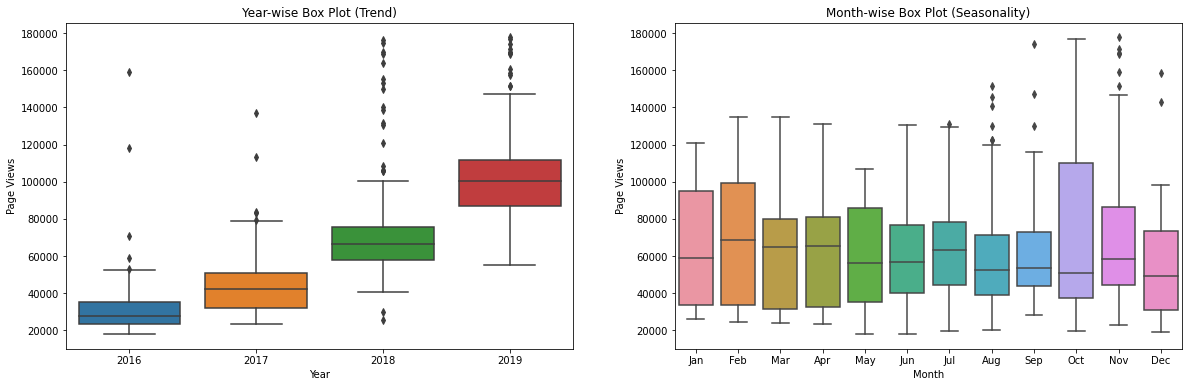

In [157]:
draw_box_plot()